###<b>1. Project Introduction

In this research project, the focus lies on predicting life expectancy in countries using advanced machine learning models. The notebook explores substantial data analysis and predictive algorithms to uncover the intricate factors influencing the variations in longevity among different countries. Through the aid of robust statistical tools, the project aims to gain valuable insights into the complex relationship between healthcare, socioeconomic factors, and life expectancy.

The dataset includes a diverse range of features that provide essential information about the countries under study. Columns such as "Population," "Gross Domestic Product (GDP)," "Total Expenditure," and "Schooling" shed light on the economic and educational aspects that might influence life expectancy. Health-related factors, including immunization rates against diseases like "Hepatitis B," "Measles," "Polio," and "Diphtheria," along with data on diseases like "HIV/AIDS," "Infant Deaths," and "Under-Five Deaths," offer significant insights into the healthcare conditions within each country.

Moreover, lifestyle-related variables such as "BMI" (Average Body Mass Index), "Alcohol" consumption, and "Thinness Prevalence" are also considered in the analysis, as these factors have been shown to impact health and, consequently, life expectancy.

By combining and analyzing this diverse set of features, the machine learning model seeks to provide a comprehensive understanding of the factors affecting life expectancy in various countries. The predictive power of the model will allow us to make informed assessments and identify key drivers that contribute to the differences in life expectancy across different regions. Ultimately, this research aims to contribute to global health insights and provide policymakers with valuable information to develop effective strategies for improving life expectancy and overall well-being in different countries.

###<b>2. Feature Description

Column descriptions for the dataset are as follows:

- Country: The country under study.
- Year: The year of the recorded data.
- Status: The status of the country's development, indicating whether it is classified as developed, developing, or other.
- Population: The population of the country.
- Hepatitis B: The percentage of one-year-olds immunized against hepatitis B.
- Measles: The number of reported measles cases per 1000 people.
- Polio: The percentage of one-year-olds immunized against polio.
- Diphtheria: The percentage of one-year-olds immunized against diphtheria.
- HIV/AIDS: The number of deaths caused by AIDS of the last 4-year-olds who were born alive per 1000 people.
- Infant Deaths: The number of infant deaths per 1000 people.
- Under-Five Deaths: The number of deaths of people under 5 years old per 1000 people.
- Total Expenditure: The ratio of government medical-health expenses to total government expenses in percentage.
- GDP (Gross Domestic Product): The economic indicator representing the total value of all goods and services produced within a country's borders.
- BMI (Body Mass Index): The average body mass index of the entire population of the country.
- Thinness 1-19 Years: The prevalence of thinness among people aged 19 years old in percentage.
- Alcohol: Liters of alcohol consumption among people over 15 years old.
- Schooling: The number of years that people study.
- Life Expectancy: The country's life expectancy, which serves as the target variable for the predictive model.

###<b>3. Initial Data Exploration

In [3]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=0c18f3cb730f9118bcb42c48215154aec9a0967c1f641a27b9bbd324c0c409b1
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [16]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 13.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=6e1568ddfe3cddf5963afa80dec2484e7523ab091bc4d58eb0b4c1b15746d5c5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

####<b>3.1. Importing Libraries and loading data

In [17]:
import warnings
warnings.filterwarnings("ignore")
import random
random.seed(10)
from pyspark.ml.feature import StringIndexer, OneHotEncoder, MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas_profiling
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import functions as F
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer

In [5]:

spark = SparkSession.builder.appName("Life_Expectancy_Prediction").getOrCreate()

# Reading the data
path_data = "life_expectancy.csv"
data = spark.read.csv(path_data, header=True, inferSchema=True)
data.show(5)

+-----------+----+----------+-----------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+
|    Country|Year|    Status| Population|Hepatitis B|Measles|Polio|Diphtheria|HIV/AIDS|infant deaths|under-five deaths|Total expenditure|       GDP| BMI|thinness  1-19 years|Alcohol|Schooling|Life expectancy|
+-----------+----+----------+-----------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+
|Afghanistan|2015|Developing|3.3736494E7|       65.0|   1154|  6.0|      65.0|     0.1|           62|               83|             8.16| 584.25921|19.1|                17.2|   0.01|     10.1|           65.0|
|Afghanistan|2014|Developing|   327582.0|       62.0|    492| 58.0|      62.0|     0.1|           64|               86|             8.18|612.696514|18.6|           

####<b>3.2. Initial Data Exploration

In [13]:
def initial_data_exploration(data):
  """Function to Perform some initial data exploration on the given Spark DataFrame."""

  # Getting the number of rows and columns in the DataFrame.
  num_rows = data.count()
  num_cols = data.columns

  print("Number of rows are: ",num_rows)
  print("Number of columns are: ", num_cols)
  print("----"*15)
  # Printing the first 5 rows of the DataFrame.
  data.show(5)
  print("----"*15)
  # Print the summary statistics of the DataFrame.
  data.describe().show()
  print("----"*15)
  # Check for missing values in the DataFrame.
  miss_values = data.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in data.columns])
  missing_values_data = miss_values.toPandas().transpose()
  missing_values_data.columns = ['Miss Count']

  print(missing_values_data)
  print("----"*15)

  print(data.printSchema())

# Perform initial data exploration.
initial_data_exploration(data)

Number of rows are:  2848
Number of columns are:  ['Country', 'Year', 'Status', 'Population', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS', 'infant deaths', 'under-five deaths', 'Total expenditure', 'GDP', 'BMI', 'thinness  1-19 years', 'Alcohol', 'Schooling', 'Life expectancy']
------------------------------------------------------------
+-----------+----+----------+-----------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+
|    Country|Year|    Status| Population|Hepatitis B|Measles|Polio|Diphtheria|HIV/AIDS|infant deaths|under-five deaths|Total expenditure|       GDP| BMI|thinness  1-19 years|Alcohol|Schooling|Life expectancy|
+-----------+----+----------+-----------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+
|Afghanistan|2015

<b>Observations</b>


* The average life expectancy in the dataset is 69.3 years.
* The standard deviation of life expectancy is 9.5 years, which means that most countries have life expectancies within 9.5 years of the average.
* The minimum life expectancy in the dataset is 36.3 years, which is in Afghanistan.
* The maximum life expectancy in the dataset is 89.0 years, which is in Zimbabwe.
* There is a positive correlation between life expectancy and GDP. This means that countries with higher GDPs tend to have longer life expectancies.
* There is a negative correlation between life expectancy and infant deaths. This means that countries with lower infant death rates tend to have longer life expectancies.
* There are some missing values in the dataset. This is likely due to the fact that some countries do not have reliable data on all of the variables in the dataset.

* The distribution of life expectancy is not normally distributed. This means that we cannot use a normal distribution to make predictions about life expectancy.
* There are some outliers in the dataset. These outliers may be due to errors in the data or to special circumstances in certain countries.
* The correlation between life expectancy and other variables is not always linear. This means that we cannot always use linear regression to make predictions about life expectancy.

* There are missing values for the following columns: Hepatitis B (542 missing values), Polio (19 missing values), Diphtheria (19 missing values), Total expenditure (221 missing values), GDP (442 missing values), BMI (32 missing values), Thinness 1-19 years (32 missing values), Alcohol (188 missing values), and Schooling (160 missing values).

* The columns with the most missing values are Hepatitis B, Polio, Diphtheria, Total expenditure, GDP, BMI, Thinness 1-19 years, Alcohol, and Schooling.

* The columns with the fewest missing values are Country, Year, Status, Population, Measles, and Life expectancy.

* The missing values are not evenly distributed across the columns. Some columns have more missing values than others.



####<b>3.3. Checking for duplicates in the data

In [14]:
def check_for_duplicates(data):
  """Checking for duplicates in the data."""

  # Get the number of distinct rows in the DataFrame.
  num_distinct_rows = data.distinct().count()

  # Get the number of total rows in the DataFrame.
  num_total_rows = data.count()

  # Check if the number of distinct rows is equal to the number of total rows.
  if num_distinct_rows == num_total_rows:
    print("There are no duplicates in the data.")
  else:
    print("There are duplicates in the data.")


check_for_duplicates(data)


There are no duplicates in the data.


- There are no duplicates present in the data

In [18]:
data.toPandas().profile_report()

Output hidden; open in https://colab.research.google.com to view.

<b>Observations</b>

Based on the provided basic descriptive statistics, it is evident that the dataset does not contain any duplicate values; however, there are some missing values present. Analyzing the correlation heat map, we observe a strong positive correlation between life expectancy (the target variable) and education, indicating that countries with higher levels of education tend to have higher life expectancies. On the other hand, there is a significant negative correlation between life expectancy and HIV/AIDS, implying that countries with higher HIV/AIDS prevalence tend to have lower life expectancies.

In [20]:
from pyspark.sql.window import Window

# Grouping by 'Country' and calculating the mean of 'HIV/AIDS'
df1 = data.groupby('Country').agg(F.mean('HIV/AIDS').alias('mean_HIV/AIDS'))

# Creating a WindowSpec to rank countries based on the mean of 'HIV/AIDS'
windowSpec = Window.orderBy(F.desc('mean_HIV/AIDS'))

# Ranking the countries based on the mean of 'HIV/AIDS' and select the top 10
top_10_countries = df1.withColumn('rank', F.rank().over(windowSpec)).filter(F.col('rank') <= 10)

# Showing the top 10 countries with the highest mean of 'HIV/AIDS'
top_10_countries.show()

+--------------------+------------------+----+
|             Country|     mean_HIV/AIDS|rank|
+--------------------+------------------+----+
|           Swaziland|          32.94375|   1|
|            Zimbabwe|23.262500000000003|   2|
|             Lesotho|22.968749999999996|   3|
|        South Africa|18.493750000000002|   4|
|              Malawi|          16.68125|   5|
|            Botswana|16.525000000000002|   6|
|             Namibia|          13.64375|   7|
|              Zambia|11.931249999999999|   8|
|          Mozambique|           11.3875|   9|
|Central African R...| 8.981250000000001|  10|
+--------------------+------------------+----+



###<b>2. Data Preprocessing

####<b>2.1. Imputing missing/Null values

In [22]:
from pyspark.sql.functions import mean

# Calculating the mean values for each column
mean_population = data.select(mean("Population")).collect()[0][0]
mean_Hepatitis_b = data.select(mean("Hepatitis B")).collect()[0][0]
mean_polio = data.select(mean("Polio")).collect()[0][0]
mean_diphtheria = data.select(mean("Diphtheria")).collect()[0][0]
mean_total_expenditure = data.select(mean("Total expenditure")).collect()[0][0]
mean_GDP = data.select(mean("GDP")).collect()[0][0]
mean_BMI = data.select(mean("BMI")).collect()[0][0]
mean_thin = data.select(mean("thinness  1-19 years")).collect()[0][0]
mean_alcohol = data.select(mean("Alcohol")).collect()[0][0]
mean_schooling = data.select(mean("Schooling")).collect()[0][0]
mean_life_expectancy = data.select(mean("Life expectancy")).collect()[0][0]

In [23]:

# Filling the missing values in each column with the corresponding mean values
data = data.na.fill({
    'Population': mean_population,
    'Hepatitis B': mean_Hepatitis_b,
    'Polio': mean_polio,
    'Diphtheria': mean_diphtheria,
    'Total expenditure': mean_total_expenditure,
    'GDP': mean_GDP,
    'BMI': mean_BMI,
    'thinness  1-19 years': mean_thin,
    'Alcohol': mean_alcohol,
    'Schooling': mean_schooling,
    'Life expectancy': mean_life_expectancy
})

# Show the cleaned Spark DataFrame
data.show(5)

+-----------+----+----------+-----------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+
|    Country|Year|    Status| Population|Hepatitis B|Measles|Polio|Diphtheria|HIV/AIDS|infant deaths|under-five deaths|Total expenditure|       GDP| BMI|thinness  1-19 years|Alcohol|Schooling|Life expectancy|
+-----------+----+----------+-----------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+
|Afghanistan|2015|Developing|3.3736494E7|       65.0|   1154|  6.0|      65.0|     0.1|           62|               83|             8.16| 584.25921|19.1|                17.2|   0.01|     10.1|           65.0|
|Afghanistan|2014|Developing|   327582.0|       62.0|    492| 58.0|      62.0|     0.1|           64|               86|             8.18|612.696514|18.6|           

In [24]:
  # Checking for missing values in the DataFrame.
  miss_values = data.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in data.columns])
  missing_values_data = miss_values.toPandas().transpose()
  missing_values_data.columns = ['Miss Count']

  print(missing_values_data)


                      Miss Count
Country                        0
Year                           0
Status                         0
Population                     0
Hepatitis B                    0
Measles                        0
Polio                          0
Diphtheria                     0
HIV/AIDS                       0
infant deaths                  0
under-five deaths              0
Total expenditure              0
GDP                            0
BMI                            0
thinness  1-19 years           0
Alcohol                        0
Schooling                      0
Life expectancy                0


####<b>2.2. Replacing the values in the status column

In [25]:
data = data.withColumn('Status', F.when(data['Status'] == 'Developing', 0).otherwise(1))

In [27]:
data.show(2)

+-----------+----+------+-----------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+
|    Country|Year|Status| Population|Hepatitis B|Measles|Polio|Diphtheria|HIV/AIDS|infant deaths|under-five deaths|Total expenditure|       GDP| BMI|thinness  1-19 years|Alcohol|Schooling|Life expectancy|
+-----------+----+------+-----------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+
|Afghanistan|2015|     0|3.3736494E7|       65.0|   1154|  6.0|      65.0|     0.1|           62|               83|             8.16| 584.25921|19.1|                17.2|   0.01|     10.1|           65.0|
|Afghanistan|2014|     0|   327582.0|       62.0|    492| 58.0|      62.0|     0.1|           64|               86|             8.18|612.696514|18.6|                17.5|   0.01|  

###<b>3. EDA

####<b>3.1. Visualizing the life expectanc over country

In [39]:
import plotly.express as px
df_pandas = data.toPandas()
df = df_pandas.copy()

# Calculating the average life expectancy for each country
df_avg_life_expectancy = df.groupby('Country')['Life expectancy'].mean().sort_values(ascending=False).reset_index()

# Creating a choropleth map to visualize the average life expectancy by country
fig = px.choropleth(df_avg_life_expectancy, locations="Country",
                    locationmode='country names',
                    color="Life expectancy",
                    title="Avg Life Expectancy for each Country",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={'Life expectancy': 'Avg Life Expectancy'})

# Setting the plot layout to use a dark theme
fig.update_layout(template='seaborn')

# Plot the choropleth map
fig.show()


In [40]:
df_avg = df.groupby('Country')[['thinness  1-19 years', 'Life expectancy']].mean().sort_values(by='thinness  1-19 years')

fig = px.bar(df_avg.reset_index(), x='Country', y='thinness  1-19 years',
             color='Life expectancy',
             labels={'thinness  1-19 years':'Average Thinness Prevalence among 1-19 years old', 'Life expectancy':'Average Life Expectancy'},
             color_continuous_scale='Bluered_r')

fig.update_layout(template='plotly_dark')
fig.update_xaxes(categoryorder='total descending')


fig.show()

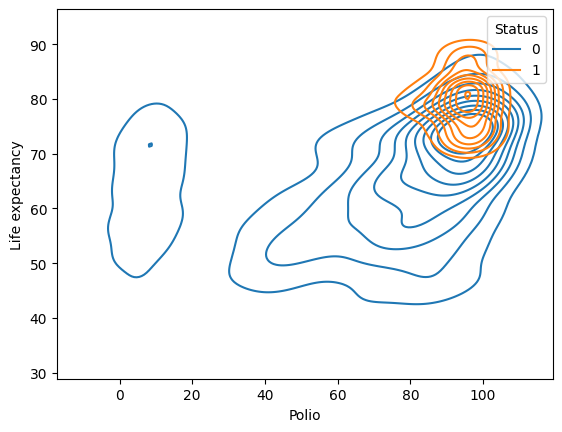

In [44]:
sns.kdeplot(x="Polio",y="Life expectancy",hue="Status",data=df);

In [46]:
figure = px.pie(df, names='Status')
figure

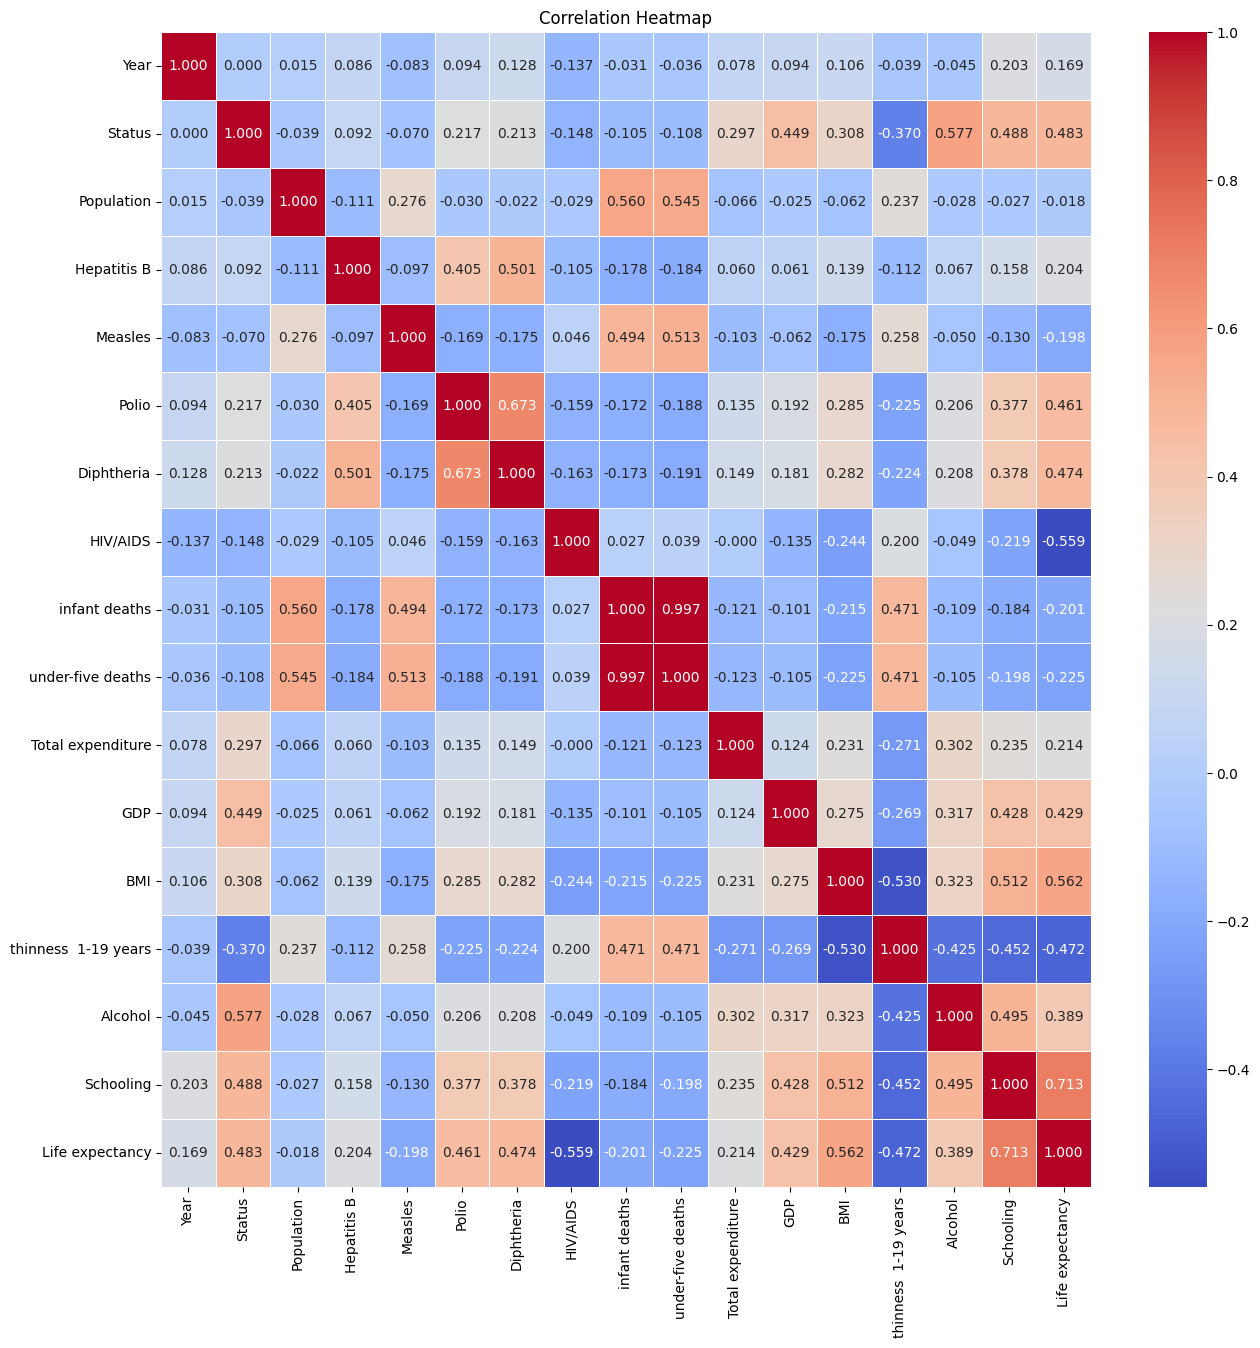

In [50]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.6)
plt.title('Correlation Heatmap')
plt.show()




1. Year and life expectancy have a positive correlation of approximately 0.17, suggesting that life expectancy has shown a gradual increase over the years.

2. The status of the country's development and life expectancy are moderately positively correlated, indicating that developed countries tend to have higher life expectancies compared to developing countries.

3. Population does not have a significant correlation with life expectancy, indicating that the size of the population does not strongly influence life expectancy.

4. Several vaccination-related variables, such as Hepatitis B, Measles, Polio, and Diphtheria, have modest positive correlations with life expectancy. This suggests that higher vaccination rates may be associated with higher life expectancies in countries.

5. HIV/AIDS shows a notable negative correlation with life expectancy, indicating that countries with higher HIV/AIDS prevalence tend to have lower life expectancies.

6. Infant deaths and under-five deaths exhibit strong negative correlations with life expectancy, confirming that countries with higher infant and child mortality rates generally have lower life expectancies.

7. Total expenditure on health is positively correlated with life expectancy, indicating that higher investments in healthcare may lead to increased life expectancies.

8. GDP (Gross Domestic Product) also demonstrates a significant positive correlation with life expectancy, suggesting that economic prosperity could be linked to higher life expectancies.

9. BMI (Body Mass Index) exhibits a positive correlation with life expectancy, implying that countries with healthier body mass indices tend to have higher life expectancies.

10. Conversely, thinness prevalence among people aged 1-19 years shows a strong negative correlation with life expectancy. This suggests that higher thinness prevalence might be associated with lower life expectancies.

11. Alcohol consumption and schooling are positively correlated with life expectancy, indicating that higher alcohol consumption rates and better educational opportunities might contribute to increased life expectancies in countries.



###<b>4. Feature Engineering

####<b>4.1. Dropping columns with low correlation

In [53]:

correlation_matrix = df.corr()

# Threshold for weak correlation
threshold = 0.1

# Get the columns to drop based on weak correlation
columns_to_drop = []
for column in correlation_matrix.columns:
    if abs(correlation_matrix['Life expectancy'][column]) < threshold and column != 'Life expectancy':
        columns_to_drop.append(column)

# Drop the columns with weak correlation from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the remaining columns in the filtered DataFrame
print(df.columns)


Index(['Country', 'Year', 'Status', 'Hepatitis B', 'Measles', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'infant deaths', 'under-five deaths',
       'Total expenditure', 'GDP', 'BMI', 'thinness  1-19 years', 'Alcohol',
       'Schooling', 'Life expectancy'],
      dtype='object')


In [54]:
df.Year.value_counts()

2015    178
2014    178
2013    178
2012    178
2011    178
2010    178
2009    178
2008    178
2007    178
2006    178
2005    178
2004    178
2003    178
2002    178
2001    178
2000    178
Name: Year, dtype: int64

In [56]:
df.Country.value_counts()

Afghanistan              16
Sao Tome and Principe    16
Niger                    16
Nigeria                  16
Norway                   16
                         ..
Greece                   16
Grenada                  16
Guatemala                16
Guinea                   16
Zimbabwe                 16
Name: Country, Length: 178, dtype: int64

- All different categries have same vallues in both these features so we would remove it from data

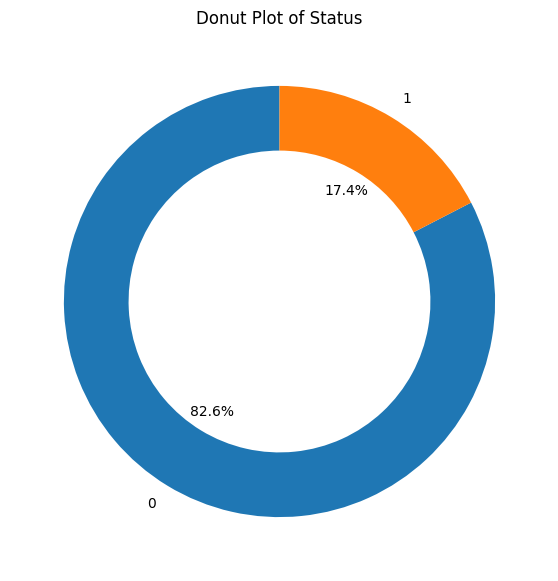

In [61]:
# Create a donut plot for Status
plt.figure(figsize=(7, 7))
plt.pie(df['Status'].value_counts(), labels=df['Status'].unique(),
        autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.title("Donut Plot of Status")
plt.show()


In [58]:
df.drop(['Year','Country'], axis=1, inplace =True)

In [62]:
df.head()

,Status,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


In [63]:
sp_df = spark.createDataFrame(df)
sp_df.show(3)

+------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+
|Status|Hepatitis B|Measles|Polio|Diphtheria|HIV/AIDS|infant deaths|under-five deaths|Total expenditure|       GDP| BMI|thinness  1-19 years|Alcohol|Schooling|Life expectancy|
+------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+
|     0|       65.0|   1154|  6.0|      65.0|     0.1|           62|               83|             8.16| 584.25921|19.1|                17.2|   0.01|     10.1|           65.0|
|     0|       62.0|    492| 58.0|      62.0|     0.1|           64|               86|             8.18|612.696514|18.6|                17.5|   0.01|     10.0|           59.9|
|     0|       64.0|    430| 62.0|      64.0|     0.1|           66|               89|             8.13|631.744976|18.1|

####<b>4.2. Scaling of data

In [68]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

input_features = [col for col in sp_df.columns if col != 'Life expectancy']

# Assemble features into a single vector column named 'features'
vector_assembler = VectorAssembler(inputCols=input_features, outputCol='features')

# Fit the vector assembler to the data
assembled_data = vector_assembler.transform(sp_df)

# Scale the features
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')

# Fit the scaler to the data
scaler_model = scaler.fit(assembled_data)

# Transform the data with scaled features
scaled_data = scaler_model.transform(assembled_data)

# Show the first few rows of the scaled data
scaled_data.show(5)

+------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+--------------------+--------------------+
|Status|Hepatitis B|Measles|Polio|Diphtheria|HIV/AIDS|infant deaths|under-five deaths|Total expenditure|       GDP| BMI|thinness  1-19 years|Alcohol|Schooling|Life expectancy|            features|     scaled_features|
+------+-----------+-------+-----+----------+--------+-------------+-----------------+-----------------+----------+----+--------------------+-------+---------+---------------+--------------------+--------------------+
|     0|       65.0|   1154|  6.0|      65.0|     0.1|           62|               83|             8.16| 584.25921|19.1|                17.2|   0.01|     10.1|           65.0|[0.0,65.0,1154.0,...|[0.0,2.8873571000...|
|     0|       62.0|    492| 58.0|      62.0|     0.1|           64|               86|             8.18|612.696514|18.6|        

####<b>4.3. Splitting the data

In [69]:
# Splitting the data into train and test sets
train_data, test_data = scaled_data.randomSplit([0.7, 0.3], seed=123)

###<b>5. Modeling

In [70]:
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor, GeneralizedLinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt



In [ ]:

# plt.xlabel('Actual Life Expectancy')
# plt.ylabel('Predicted Life Expectancy')
# plt.legend()
# plt.title('Actual vs. Predicted Life Expectancy for Different Models')
# plt.show()

# # Plot RMSE values
# plt.bar(model_names, rmse_values)
# plt.xlabel('Model')
# plt.ylabel('RMSE')
# plt.title('Root Mean Squared Error (RMSE) for Different Models')
# plt.xticks(rotation=45)
# plt.show()


In [ ]:
# Create and train the models
linear_regression = LinearRegression(featuresCol='scaled_features', labelCol='Life expectancy')
random_forest = RandomForestRegressor(featuresCol='scaled_features', labelCol='Life expectancy')
gradient_boosted_trees = GBTRegressor(featuresCol='scaled_features', labelCol='Life expectancy')
generalized_linear_regression = GeneralizedLinearRegression(featuresCol='scaled_features', labelCol='Life expectancy', family='gaussian')

# Fit the models to the training data
linear_regression_model = linear_regression.fit(train_data)
random_forest_model = random_forest.fit(train_data)
gradient_boosted_trees_model = gradient_boosted_trees.fit(train_data)
generalized_linear_regression_model = generalized_linear_regression.fit(train_data)


In [ ]:
# Make predictions on the test data
linear_regression_predictions = linear_regression_model.transform(test_data)
random_forest_predictions = random_forest_model.transform(test_data)
gradient_boosted_trees_predictions = gradient_boosted_trees_model.transform(test_data)
generalized_linear_regression_predictions = generalized_linear_regression_model.transform(test_data)

In [75]:
# Evaluate the models using RMSE, MSE, and MAE
evaluator = RegressionEvaluator(labelCol='Life expectancy', metricName='rmse')
linear_regression_rmse = evaluator.evaluate(linear_regression_predictions)
random_forest_rmse = evaluator.evaluate(random_forest_predictions)
gradient_boosted_trees_rmse = evaluator.evaluate(gradient_boosted_trees_predictions)
generalized_linear_regression_rmse = evaluator.evaluate(generalized_linear_regression_predictions)

evaluator.setMetricName('mse')
linear_regression_mse = evaluator.evaluate(linear_regression_predictions)
random_forest_mse = evaluator.evaluate(random_forest_predictions)
gradient_boosted_trees_mse = evaluator.evaluate(gradient_boosted_trees_predictions)
generalized_linear_regression_mse = evaluator.evaluate(generalized_linear_regression_predictions)

evaluator.setMetricName('mae')
linear_regression_mae = evaluator.evaluate(linear_regression_predictions)
random_forest_mae = evaluator.evaluate(random_forest_predictions)
gradient_boosted_trees_mae = evaluator.evaluate(gradient_boosted_trees_predictions)
generalized_linear_regression_mae = evaluator.evaluate(generalized_linear_regression_predictions)

# Print the evaluation metrics
print("Linear Regression - RMSE:", linear_regression_rmse)
print("Random Forest - RMSE:", random_forest_rmse)
print("Gradient Boosted Trees - RMSE:", gradient_boosted_trees_rmse)
print("Generalized Linear Regressor - RMSE:", generalized_linear_regression_rmse)

print("Linear Regression - MSE:", linear_regression_mse)
print("Random Forest - MSE:", random_forest_mse)
print("Gradient Boosted Trees - MSE:", gradient_boosted_trees_mse)
print("Generalized Linear Regressor - MSE:", generalized_linear_regression_mse)

print("Linear Regression - MAE:", linear_regression_mae)
print("Random Forest - MAE:", random_forest_mae)
print("Gradient Boosted Trees - MAE:", gradient_boosted_trees_mae)
print("Generalized Linear Regressor - MAE:", generalized_linear_regression_mae)



Linear Regression - RMSE: 4.445212571455883
Random Forest - RMSE: 3.233602521601861
Gradient Boosted Trees - RMSE: 2.941489775611084
Generalized Linear Regressor - RMSE: 4.445212571455883
Linear Regression - MSE: 19.75991480542943
Random Forest - MSE: 10.456185267709916
Gradient Boosted Trees - MSE: 8.652362100024545
Generalized Linear Regressor - MSE: 19.75991480542943
Linear Regression - MAE: 3.4227077418683365
Random Forest - MAE: 2.412787815279466
Gradient Boosted Trees - MAE: 2.1588932721000624
Generalized Linear Regressor - MAE: 3.4227077418683365


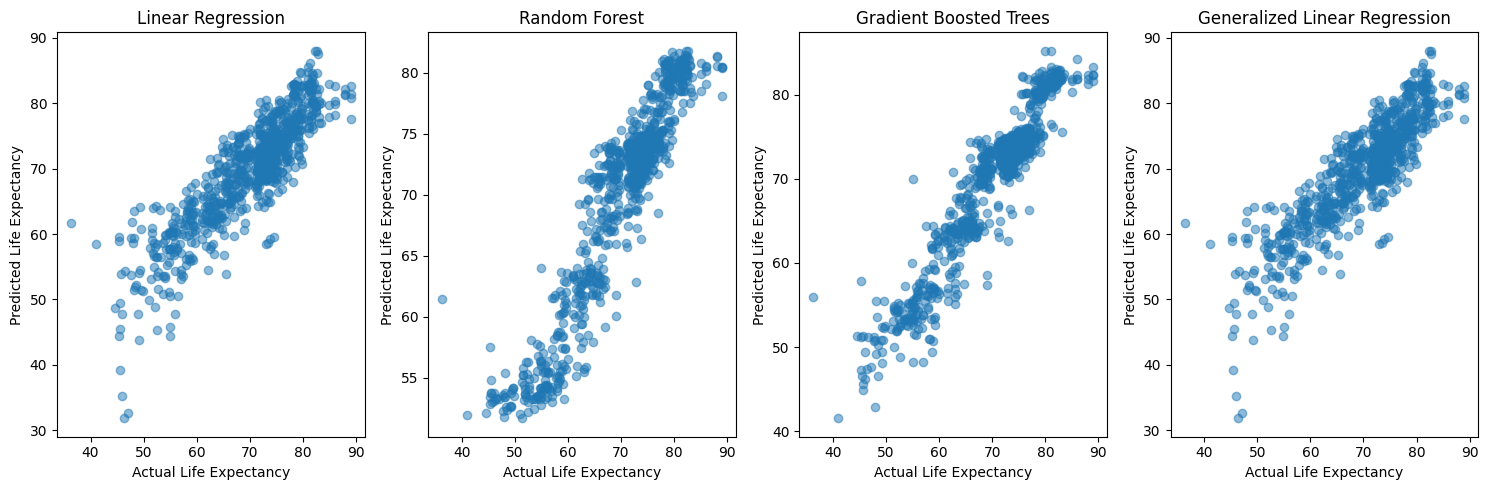

In [79]:

# Scatter plots
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 4, 1)
plt.scatter(test_data.select('Life expectancy').collect(), linear_regression_predictions.select('prediction').collect(), alpha=0.5)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Linear Regression')

# Random Forest
plt.subplot(1, 4, 2)
plt.scatter(test_data.select('Life expectancy').collect(), random_forest_predictions.select('prediction').collect(), alpha=0.5)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Random Forest')

# Gradient Boosted Trees
plt.subplot(1, 4, 3)
plt.scatter(test_data.select('Life expectancy').collect(), gradient_boosted_trees_predictions.select('prediction').collect(), alpha=0.5)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Gradient Boosted Trees')

# Support Vector Regression
plt.subplot(1, 4, 4)
plt.scatter(test_data.select('Life expectancy').collect(), generalized_linear_regression_predictions.select('prediction').collect(), alpha=0.5)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Generalized Linear Regression')

plt.tight_layout()
plt.show()


In [82]:

# Create the comparison table
metrics_data = {
    'Model': ['Linear Regression', 'Random Forest Regression', 'Gradient Boosted Tree Regression','Generalized Linear Regression'],
    'MSE': [linear_regression_mse, random_forest_mse, gradient_boosted_trees_mse, generalized_linear_regression_mse],
    'RMSE': [linear_regression_rmse, random_forest_rmse, gradient_boosted_trees_rmse, generalized_linear_regression_rmse],
    'MAE': [linear_regression_mae, random_forest_mae, gradient_boosted_trees_mae, generalized_linear_regression_mae]
}

# Create the pandas DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the table
metrics_df

,Model,MSE,RMSE,MAE
0,Linear Regression,19.759915,4.445213,3.422708
1,Random Forest Regression,10.456185,3.233603,2.412788
2,Gradient Boosted Tree Regression,8.652362,2.941490,2.158893
3,Generalized Linear Regression,19.759915,4.445213,3.422708


<b>Observation</b>

1. Linear Regression: The linear regression model produced an MSE of 19.76, RMSE of 4.45, and MAE of 3.42. While this model provides a simple baseline for life expectancy prediction, it seems to have a relatively higher error, which indicates that the linear relationship may not fully capture the complexities of the data.

2. Random Forest Regression: The random forest regression model demonstrated improved performance with an MSE of 10.46, RMSE of 3.23, and MAE of 2.41. The random forest approach harnesses the power of multiple decision trees to reduce overfitting and improve accuracy, making it a more robust option compared to linear regression.

3. Gradient Boosted Tree Regression: Among the evaluated models, the gradient boosted tree regression stood out as the best performer. It achieved an MSE of 8.65, RMSE of 2.94, and MAE of 2.16. The gradient boosting technique creates an ensemble of weak learners, iteratively improving the model's accuracy, which is evident from its lower error metrics.

4. Generalized Linear Regression: Interestingly, the generalized linear regression model produced the same results as the linear regression, with an MSE of 19.76, RMSE of 4.45, and MAE of 3.42. This similarity suggests that the additional complexity introduced by the generalization did not significantly impact the model's performance in comparison to the standard linear regression.

Overall, the gradient boosted tree regression model emerged as the most promising choice for predicting life expectancy, offering the lowest MSE, RMSE, and MAE among the evaluated models. However, further fine-tuning can enhance the model's performance even more and improve the accuracy of life expectancy predictions.

###<b>6. Hyper parameter tuning best model

In [83]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import GBTRegressor

# Initialize the Gradient Boosted Tree Regressor
gbt = GBTRegressor(featuresCol='scaled_features', labelCol='Life expectancy', maxIter=10)

# Define the hyperparameter grid
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [5, 10, 15])
             .addGrid(gbt.maxBins, [16, 32, 48])
             .addGrid(gbt.stepSize, [0.05, 0.1, 0.2])
             .build())

# Define the evaluator
evaluator = RegressionEvaluator(metricName='rmse', labelCol='Life expectancy')

# Initialize the CrossValidator
crossval = CrossValidator(estimator=gbt,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)

# Fit the model with CrossValidator
cv_model = crossval.fit(train_data)

# Get the best model from CrossValidator
best_model = cv_model.bestModel

# Print the best hyperparameters
print("Best Max Depth: ", best_model.getMaxDepth())
print("Best Max Bins: ", best_model.getMaxBins())
print("Best Step Size: ", best_model.getStepSize())


Best Max Depth:  5
Best Max Bins:  32
Best Step Size:  0.2


In [84]:
evaluator = RegressionEvaluator(metricName='rmse', labelCol='Life expectancy')

# Make predictions on the test data using the best model
predictions = best_model.transform(test_data)

# Calculate RMSE, MSE, and MAE
rmse = evaluator.evaluate(predictions)
mse = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})

# Display the evaluation results
print("RMSE on Test Data:", rmse)
print("MSE on Test Data:", mse)
print("MAE on Test Data:", mae)


RMSE on Test Data: 2.958354955476468
MSE on Test Data: 8.751864042592176
MAE on Test Data: 2.1700227764408573


- It can be observed that tuning did not improve the model much so the current gradient boosting model seems to be the best model

###<b>7. Ethical and Moral principles

When we are predicting the life expectancy using Machine Learning for a project, it is essential to consider ethical and moral principles to ensure responsible and fair use of the data and models. Here are some key principles to keep in mind:

1. Data Privacy and Security: Prioritize the privacy and security of individuals' data used for the model. Anonymize or pseudonymize sensitive information to prevent the identification of individuals. Use secure data storage and transmission protocols to safeguard against unauthorized access.

2. Fairness and Bias Mitigation: Be vigilant about potential biases in the data that might affect the model's predictions. Ensure that the model does not perpetuate unfair discrimination or reinforce existing social inequalities. Strive for fairness in both the data used for training and the model's decision-making process.

3. Transparency and Interpretability: Aim to create ML models that are interpretable and transparent. Users should understand how the model makes predictions and what features contribute to its decisions. This fosters trust in the model's predictions and allows for easier identification of potential biases.

4. Informed Consent: When collecting data from individuals, obtain informed consent and clearly explain the purpose and use of their data for life expectancy prediction. Allow individuals to withdraw their consent and have control over their data.

5. Beneficence: Ensure that the use of ML models for predicting life expectancy benefits the well-being of individuals and society as a whole. The primary goal should be to improve public health and healthcare outcomes.

6. Accountability and Governance: Establish clear accountability for the development and deployment of ML models. Set up appropriate governance mechanisms to review and monitor the models' impact regularly.

7. Continuous Improvement and Validation: Regularly review and validate the model's predictions against real-world data. Improve the model iteratively based on new insights and feedback to enhance its accuracy and fairness.

8. Avoiding Misuse: Be cautious about potential misuse of the models for discriminatory or harmful purposes. Proactively address any concerns or misuse by users of the model.

9. Collaboration and Communication: Engage in open communication with stakeholders, including healthcare professionals, policymakers, and affected communities. Collaborate with experts from diverse fields to ensure a comprehensive and ethical approach to life expectancy prediction.

10. Social Impact Assessment: Conduct a social impact assessment to understand the potential consequences of deploying the model in different contexts. Strive to maximize positive impact while minimizing harm.

